In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
 
# The nodes of the graph are the transportation modes
nodes = ["T", "APM", "B", "SDS", "SAV", "RH", "EB", "W"]
 
# Invalid edges are modes that are not taken together
invalid_edges = [
    ("T", "APM"),
    ("T", "B"),
    ("APM", "B"),
    ("T", "SDS"),
    ("T", "SAV"),
    ("APM", "SAV"),
    ("SDS", "SAV"),
    ("T", "RH"),
    ("APM", "RH"),
    ("SDS", "RH"),
    ("SAV", "RH"),
    ("T", "EB"),
    ("APM", "EB"),
    ("B", "EB"),
    ("T", "W"),
    ("APM", "W"),
]

In [3]:
G = nx.Graph()
G.add_nodes_from(nodes)
 
# Add edges between all node pairs
G.add_edges_from(combinations(nodes, 2))
G.remove_edges_from(invalid_edges)

In [4]:
# Use the greedy coloring algorithm
color_dict = nx.coloring.greedy_color(G, strategy="largest_first")
color_map = [color_dict[node] for node in G]

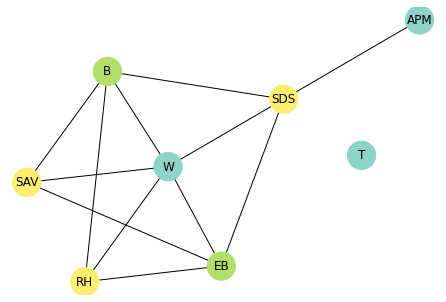

In [5]:
nx.draw_kamada_kawai(
    G, with_labels=True, node_color=color_map, 
    node_size=800, cmap=plt.cm.Set3
)